## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE','TAG','POSTS'])
df

,DATE,TAG,POSTS
0,7/1/2008 0:00,c#,3
1,8/1/2008 0:00,assembly,8
2,8/1/2008 0:00,c,83
3,8/1/2008 0:00,c#,506
4,8/1/2008 0:00,c++,164
...,...,...,...
2323,7/1/2022 0:00,php,4076
2324,7/1/2022 0:00,python,23461
2325,7/1/2022 0:00,r,4302
2326,7/1/2022 0:00,ruby,461


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [49]:
df.head()

,DATE,TAG,POSTS
0,7/1/2008 0:00,c#,3
1,8/1/2008 0:00,assembly,8
2,8/1/2008 0:00,c,83
3,8/1/2008 0:00,c#,506
4,8/1/2008 0:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2328, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2328
TAG      2328
POSTS    2328
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [50]:
total_posts = df[['TAG','POSTS']].groupby('TAG').sum()
total_posts
total_posts.idxmax()

POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [51]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,168,168
c,168,168
c#,169,169
c++,168,168
delphi,168,168
go,153,153
java,168,168
javascript,168,168
perl,168,168


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [52]:
df['DATE'][1]

'8/1/2008 0:00'

In [40]:
df.DATE[1]

'8/1/2008 0:00'

In [53]:
df.DATE = pd.to_datetime(df.DATE)

## Data Manipulation



In [54]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.sort_index

<bound method DataFrame.sort_index of TAG         assembly       c      c#     c++  delphi     go    java  \
DATE                                                                  
2008-07-01       NaN     NaN     3.0     NaN     NaN    NaN     NaN   
2008-08-01       8.0    83.0   506.0   164.0    14.0    NaN   222.0   
2008-09-01      28.0   318.0  1647.0   753.0   104.0    NaN  1133.0   
2008-10-01      15.0   303.0  1989.0   809.0   112.0    NaN  1150.0   
2008-11-01      17.0   259.0  1732.0   734.0   141.0    NaN   957.0   
...              ...     ...     ...     ...     ...    ...     ...   
2022-03-01     251.0  2098.0  6469.0  3835.0   134.0  828.0  8088.0   
2022-04-01     266.0  1872.0  5941.0  3851.0   122.0  756.0  7834.0   
2022-05-01     287.0  1916.0  6297.0  3897.0   129.0  678.0  7872.0   
2022-06-01     248.0  1671.0  6133.0  3421.0   125.0  744.0  7085.0   
2022-07-01     221.0  1559.0  6236.0  3460.0   128.0  786.0  6979.0   

TAG         javascript   perl     php 

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [55]:
reshaped_df.shape

(169, 14)

In [56]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [57]:
reshaped_df.fillna(0, inplace=True)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [58]:
reshaped_df.count()

TAG
assembly      169
c             169
c#            169
c++           169
delphi        169
go            169
java          169
javascript    169
perl          169
php           169
python        169
r             169
ruby          169
swift         169
dtype: int64

In [59]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

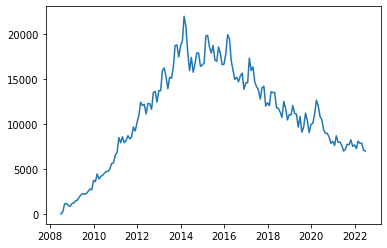

In [60]:
plt.plot(reshaped_df['java'])

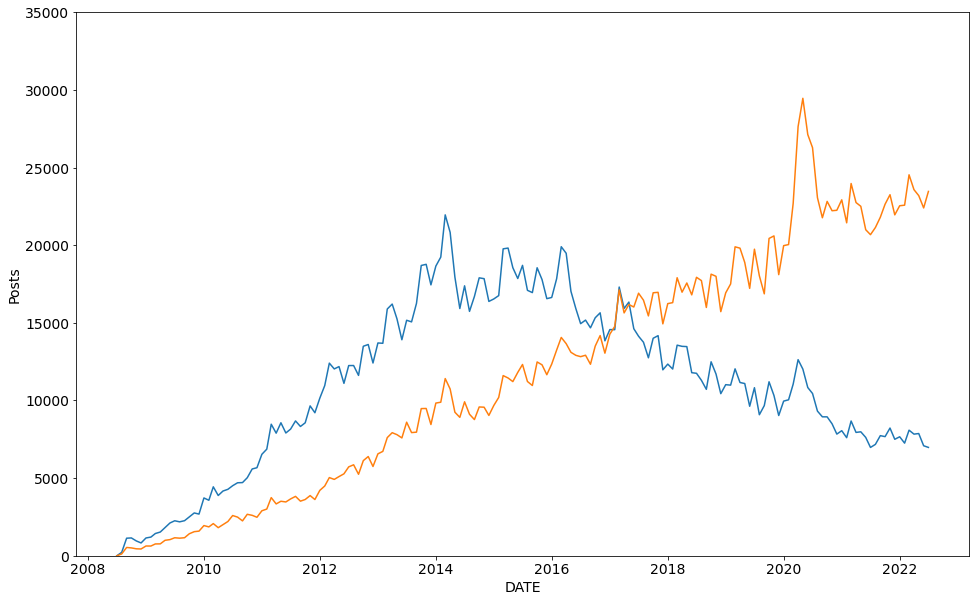

In [68]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

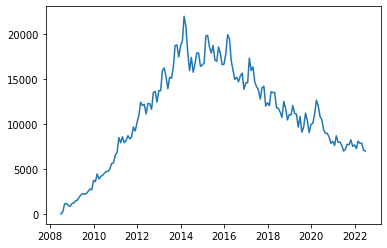

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

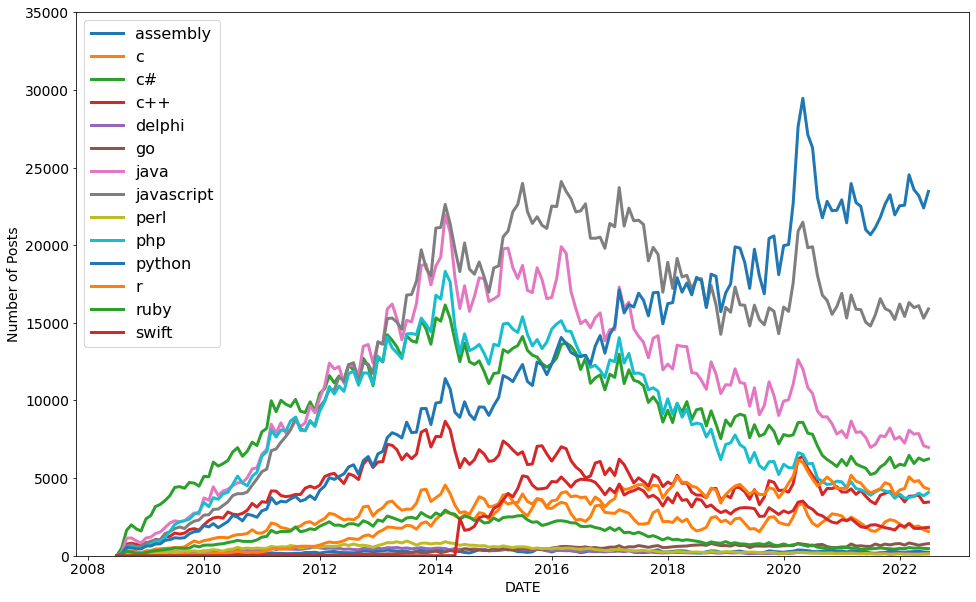

In [75]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()


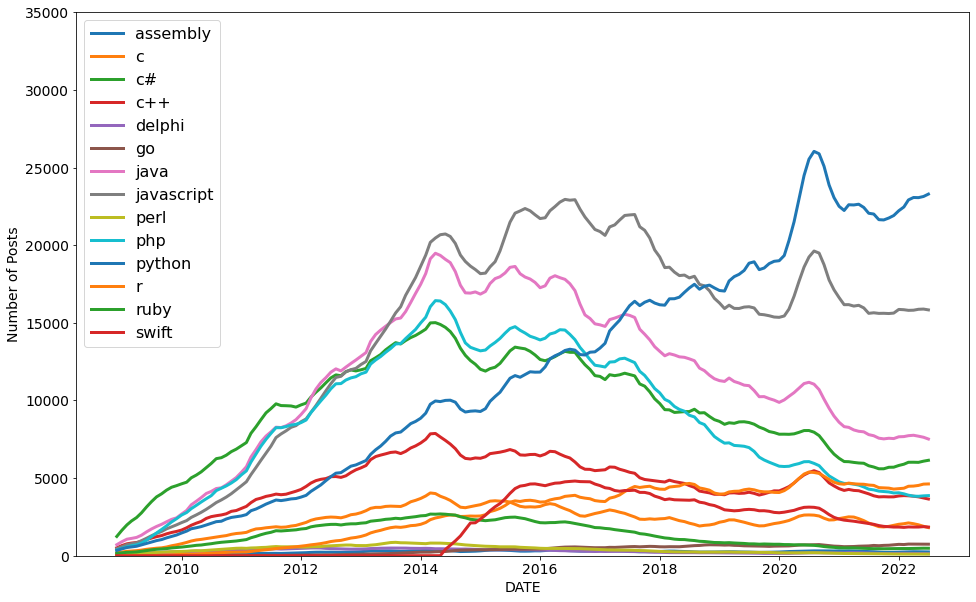

In [76]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

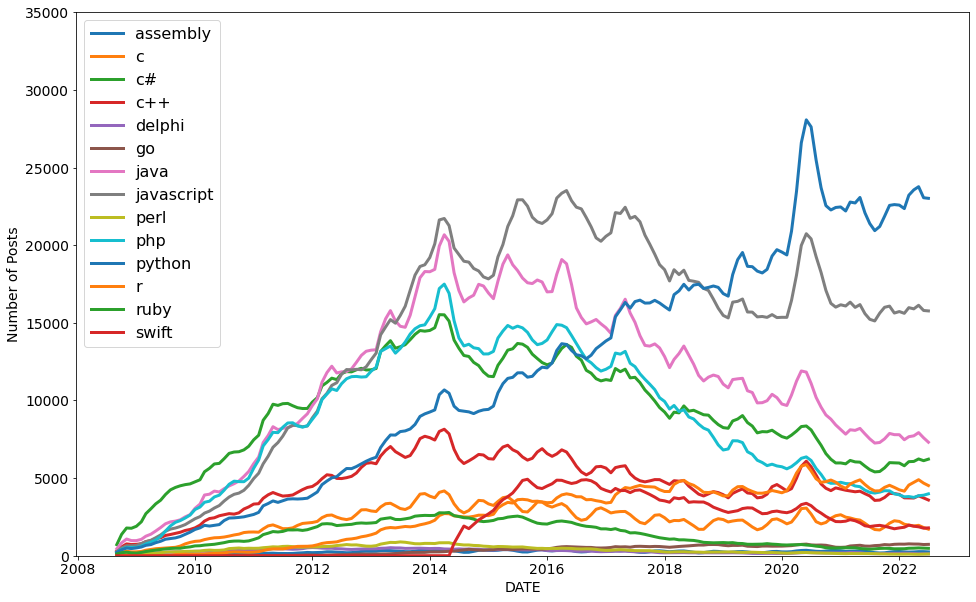

In [77]:
roll_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

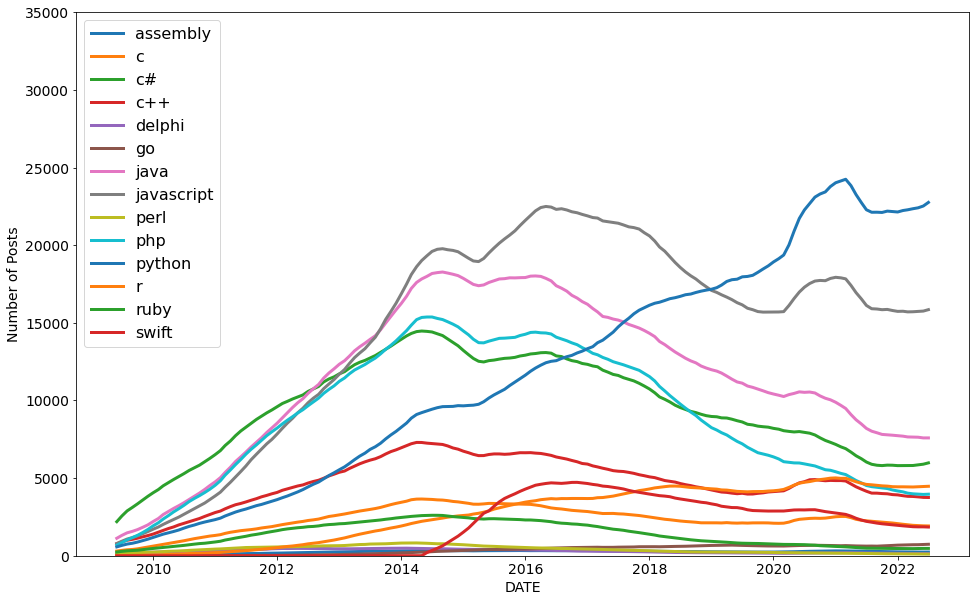

In [78]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)